# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2023-24 учебный год

# Семинар 14. Задача регрессии


На этом семинаре мы с вами попробуем решить задачу регрессии с нуля — что называется "из коробки" — и по ходу дела подробно обсудим все сопутствующие аспекты, которые встретятся нам в процессе такого рассмотрения.

## Описание данных

In [ ]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np

Сегодня мы с вами будем использовать набор данных Automobile Data Set (https://archive.ics.uci.edu/ml/datasets/Automobile).

Эти данные достаточно хороши и разнообразны; в них присутствуют категориальные, целочисленные и вещественнозначные признаки. Также в рамках целевой переменной датасет предполагает решение задачи регрессии, что мы как раз и хотели сегодня реализовать.

In [ ]:
columns = ["symboling",
 "normalized-losses",
 "make",
 "fuel-type",
 "aspiration",
 "num-of-doors",
 "body-style",
 "drive-wheels",
 "engine-location",
 "wheel-base",
 "length",
 "width",
 "height",
 "curb-weight",
 "engine-type",
 "num-of-cylinders",
 "engine-size",
 "fuel-system",
 "bore",
 "stroke",
 "compression-ratio",
 "horsepower",
 "peak-rpm",
 "city-mpg",
 "highway-mpg",
 "price"]

Загрузим данные при помощи `read_csv` по ссылке: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

Помним об аргументах `header` и `names`.

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None, names=columns)

Проверим, что все загрузилось верно, выведя первые строчки датасета, и посмотрим на сами данные:

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Как мы уже обсудили, сегодня мы решаем задачу регрессии. Что же является целевой переменной в представленном датасете?

## Подготовка данных

Для начала давайте осуществим предварительную подготовку данных: посмотрим на наши данные, найдем пропуски, закодируем признаки. Всё, как и обсуждали в модуле по EDA!

### Детектирование пропусков

Посмотрим, сколько пропусков имеется в наших данных.


In [ ]:
df.isna().sum().sum()

0

Что-то странное... На сайте указано, что пропуски есть!

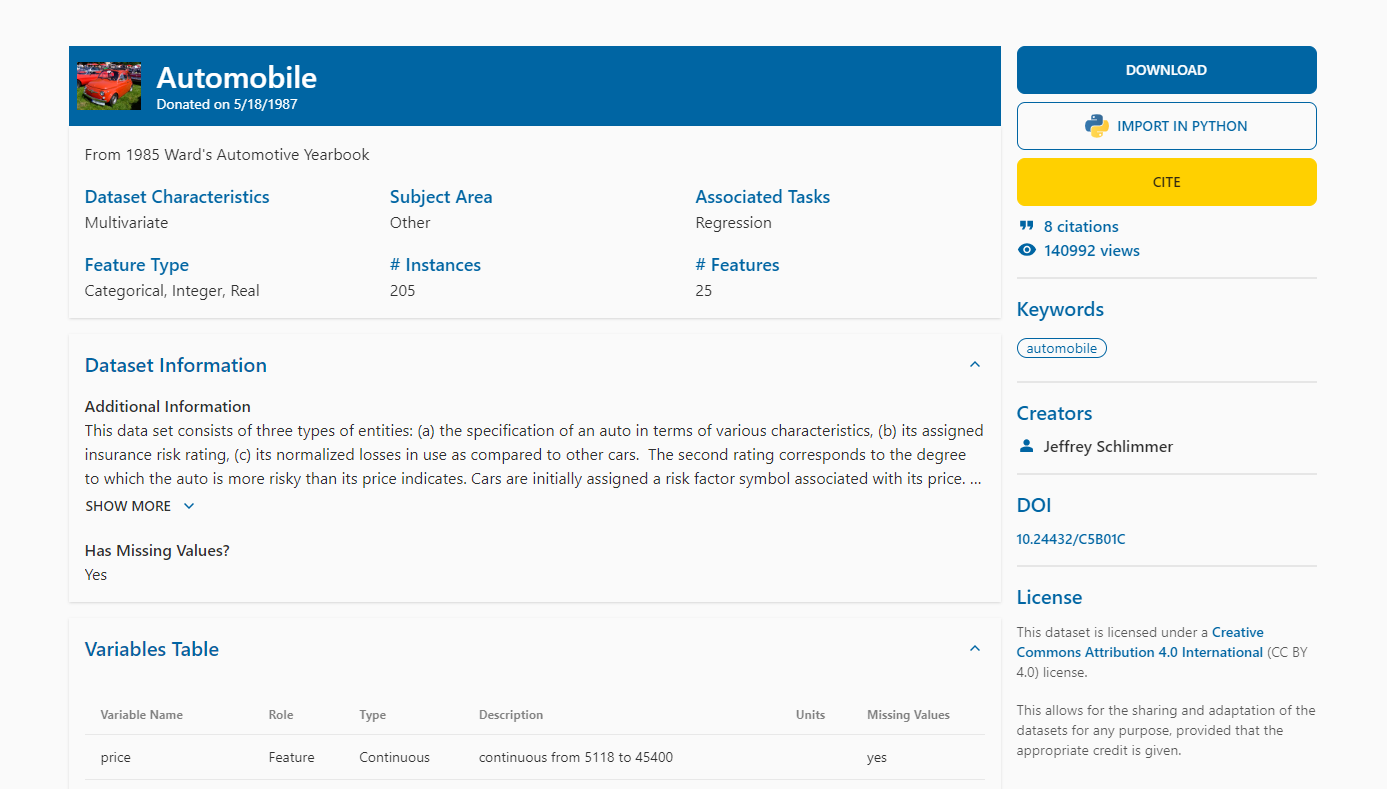

Однако в данных мы этого не видим...

Есть гипотезы, почему?

Давайте еще раз посмотрим на датасет!

In [ ]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


При внимательном рассмотрении можно увидеть, что пропуски в данных помечаются, судя по всему, специальным знаком "?". Давайте посчитаем, сколько в данных присутствует таких знаков.


In [ ]:
(df == "?").sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
df.shape

(205, 26)

Заметная история!

Давайте избавимся от этих знаков вопроса и приведем всё к стандартному и привычному нам `np.nan` при помощи метода `replace`.

In [ ]:
df = df.replace({"?": np.nan})

Есть ли пропуски теперь?

In [ ]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Да, вот это уже больше похоже на нашу классическую историю.

### Преобразования типов данных

Поскольку те признаки раньше содержали вопросительные знаки и поскольку pandas устроен так, что, если хотя бы одно значение в столбце является строковым, весь столбец сразу помечается типом `object` — с учетом этого, мы сейчас имеем истинно численные признаки обозначенные якобы как категориальные.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Надо это исправить!

In [ ]:
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['price'] = df['price'].astype(float)

Замечательно, с этим справились!

Давайте теперь посмотрим на признаки, в которых меньше 10 уникальных значений. Все ли из них являются на самом деле полноценно категориальными?

In [ ]:
df.nunique()[df.nunique() < 10].index

Index(['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

Те столбцы, которые можно явно перевести в цифры (например если в столбцах цифры написаны буквами), стоит и вправду трансформировать и перевести в численный тип. В этом нам опять же поможет метод `replace`.

In [ ]:
str_num_cols = ["num-of-doors", "num-of-cylinders"]
df[str_num_cols] = df[str_num_cols].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'twelve': 12})

Проверим, что всё получилось.

In [ ]:
df["num-of-doors"].unique()

array([ 2.,  4., nan])

In [ ]:
df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [ ]:
df[str_num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num-of-doors      203 non-null    float64
 1   num-of-cylinders  205 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


Отлично! Уже гораздо лучше.

### Категориальные признаки

Давайте посмотрим на те признаки, которые в нашем датафрейме по прежнему определяются как тип `object`.

In [ ]:
df.select_dtypes(include = ['object']).columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

Кажется, всё достаточно разумно. В том смысле, что данные признаки действительно, судя по всему, являются категориальными и требуют дальнейшей работы как с классическими категориальными столбцами.

Но прежде чем перейти к работе с ними, давайте еще отдельно внимательно посмотрим на столбец `make`. Что он из себя представляет?

In [ ]:
df["make"].head(15)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
Name: make, dtype: object

Как вы думаете, почему я акцентировал такое внимание именно на этом столбце?

#### Допущение #1

Итак, в этом месте в нашем ноутбуке происходит одна из важных развилок. Мы сделаем с вами некоторое допущение и продолжим работу с учетом него, чтобы дальше построить бейзлайн для нашей задачи. (Кстати, напомните, что такое бейзлайн?)

Однако затем, позднее, когда вы будете работать над улучшением качества алгоритма, рекомендуется найти по навигатору данный блок с допущением (а также другие блоки допущений) и применить некоторый более продвинутый подход вместо того, который нами пробуется изначально.

При правильной работе вы сможете сравнить результаты до и после, что является крайне полезным и показательным — в особенности на этапе первичного погружения в машинное обучение.

Какое же такое страшное допущение мы совершим? Давайте пока что просто удалим все категориальные столбцы, вместо того чтобы их как-то преобразовывать.

Отдельно ещё отметим удаление столбца `make`, упоминавшегося нами раннее.

In [ ]:
df = df.drop(columns=["make"])

In [ ]:
df = df.drop(columns=['symboling', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   num-of-doors       203 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   num-of-cylinders   205 non-null    int64  
 8   engine-size        205 non-null    int64  
 9   bore               201 non-null    float64
 10  stroke             201 non-null    float64
 11  compression-ratio  205 non-null    float64
 12  horsepower         203 non-null    float64
 13  peak-rpm           203 non-null    float64
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              201 non

Ну что же — можно видеть, что категориальных признаков больше не осталось!

На будущее вам может пригодиться следующий код для применения OHE (если вы будете модифицировать программу на месте Допущения #1):

    df = pd.get_dummies(
        df,
        columns=['symboling', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'],
        drop_first=True
    )

    df = pd.get_dummies(
        df,
        columns=['make'],
        drop_first=True
    )

### Обработка пропусков

Итак, с категориальными признаками мы разобрались — осталось окончательно разобраться с пропусками: они у нас в данных по-прежнему пока что присутствуют.

Убедимся в этом, кстати!

In [ ]:
df.isna().any()

normalized-losses     True
num-of-doors          True
wheel-base           False
length               False
width                False
height               False
curb-weight          False
num-of-cylinders     False
engine-size          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

#### Допущение #2

А вот и наше второе допущение (которое мы сделаем со всеми теми же оговорками и порядками, что и первое). Предлагается все пропуски на текущем этапе просто заполнить средним.

Понятное дело, не самый интеллектуальный способ. Но на то оно и допущение, чтобы иметь хороший последующий пласт работ для дальнейшего улучшения качества вашего алгоритма.

In [ ]:
df.fillna(df.mean(), inplace = True)

In [ ]:
df.isna().any()

normalized-losses    False
num-of-doors         False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
num-of-cylinders     False
engine-size          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

Пропусков в данных больше не осталось!

## Машинное обучение

Теперь, когда мы, наконец, завершили длинный и утомляющий этап EDA (а это, как вы, наверное, понимаете, мы ещё только по верхам, на самом деле, его осуществили — к вопросу, между прочим, о том, какое количество времени Data Scientist проводит за первичной предобработкой, а какое — реально за разработкой алгоритма и модели) — так или иначе, теперь, когда этот этап позади, — мы полноценно готовы переходить к машинному обучению!

И соответственно первый вопрос: когда мы переходим к машинному обучению, что в начале мы должны сразу осуществить?

Правильно — разделение на train и test!

### Задание для самостоятельного решения (разделение выборки на train и test)

Осуществите разделение датафрейма df на обучающую и тестовую выборку с использованием функции `train_test_split` из модуля `sklearn.model_selection`.

Пропорцию тестовой выборки установите как 20%. Значение `random_state` установите как 13.


In [ ]:
from sklearn.model_selection import train_test_split

# your code here

# X_train, X_test, y_train, y_test = ...

In [ ]:
X_train

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
111,161.0,4.0,107.9,186.7,68.4,56.7,3075,4,120,3.46,2.19,8.4,95.0,5000.0,19,24
96,122.0,4.0,94.5,165.3,63.8,54.5,1971,4,97,3.15,3.29,9.4,69.0,5200.0,31,37
151,87.0,2.0,95.7,158.7,63.6,54.5,2040,4,92,3.05,3.03,9.0,62.0,4800.0,31,38
158,91.0,4.0,95.7,166.3,64.4,53.0,2275,4,110,3.27,3.35,22.5,56.0,4500.0,34,36
97,103.0,4.0,94.5,170.2,63.8,53.5,2037,4,97,3.15,3.29,9.4,69.0,5200.0,31,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,168.0,2.0,95.1,162.4,63.8,53.3,2008,4,97,3.15,3.29,9.4,69.0,5200.0,31,37
16,122.0,2.0,103.5,193.8,67.9,53.7,3380,6,209,3.62,3.39,8.0,182.0,5400.0,16,22
74,122.0,2.0,112.0,199.2,72.0,55.4,3715,8,304,3.80,3.35,8.0,184.0,4500.0,14,16
176,65.0,4.0,102.4,175.6,66.5,54.9,2414,4,122,3.31,3.54,8.7,92.0,4200.0,27,32


## K-Nearest Neighbors

Алгоритм KNN является одним из самых простых алгоритмов машинного обучения. И хотя он зачастую не может решить поставленную перед ним задачу с должным качеством, его нередко используют как подготовительный фильтр для объектов, которые будут проверяться впоследствии более сложными моделями (или же иными словами — как бейзлайн).

Еще одним преимуществом данного алгоритма является его интерпретируемость. То есть мы легко (особенно в сравнении со многими другими алгоритмами) можем проанализировать, почему наша модель приняла то или иное решение.

В то же время, алгоритм имеет ряд ограничений для данных, о которых мы поговорим в постановке ниже.

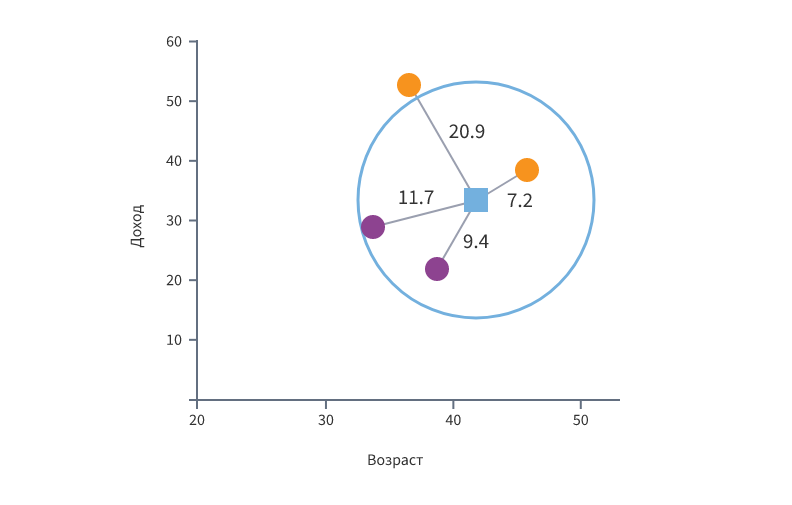

### Постановка задачи

Пусть у нас есть данные, которые записаны привычным для нас
образом, в виде матрицы признаков размера $M\times N$, где $M$ – число объектов, а $N$ – число признаков.

Сделаем предположение, что все $N$ признаков находятся в одном
метрическом пространстве. Если это так, то каждый из $M$ объектов является просто точкой в $N$-мерном метрическом
пространстве, а это значит, что мы можем посчитать расстояние
между любыми двумя точками.

Тогда, если мы выберем какую-нибудь точку, мы сможем сказать
какая из $M-1$ оставшихся точек будет являться самой ближайшей к рассматриваемой – такую точку назовем ближайшим соседом.

Аналогичным образом можно определить второго по близости соседа и т.д.

Ну а далее, поскольку мы приняли, что наше пространство
метрическое, мы можем утверждать, что точки, расстояние
между которыми небольшое, будут похожи между собой, а те, у
которых расстояние будет большим, будут являться непохожими.

А значит алгоритм KNN является обоснованным и применимым!






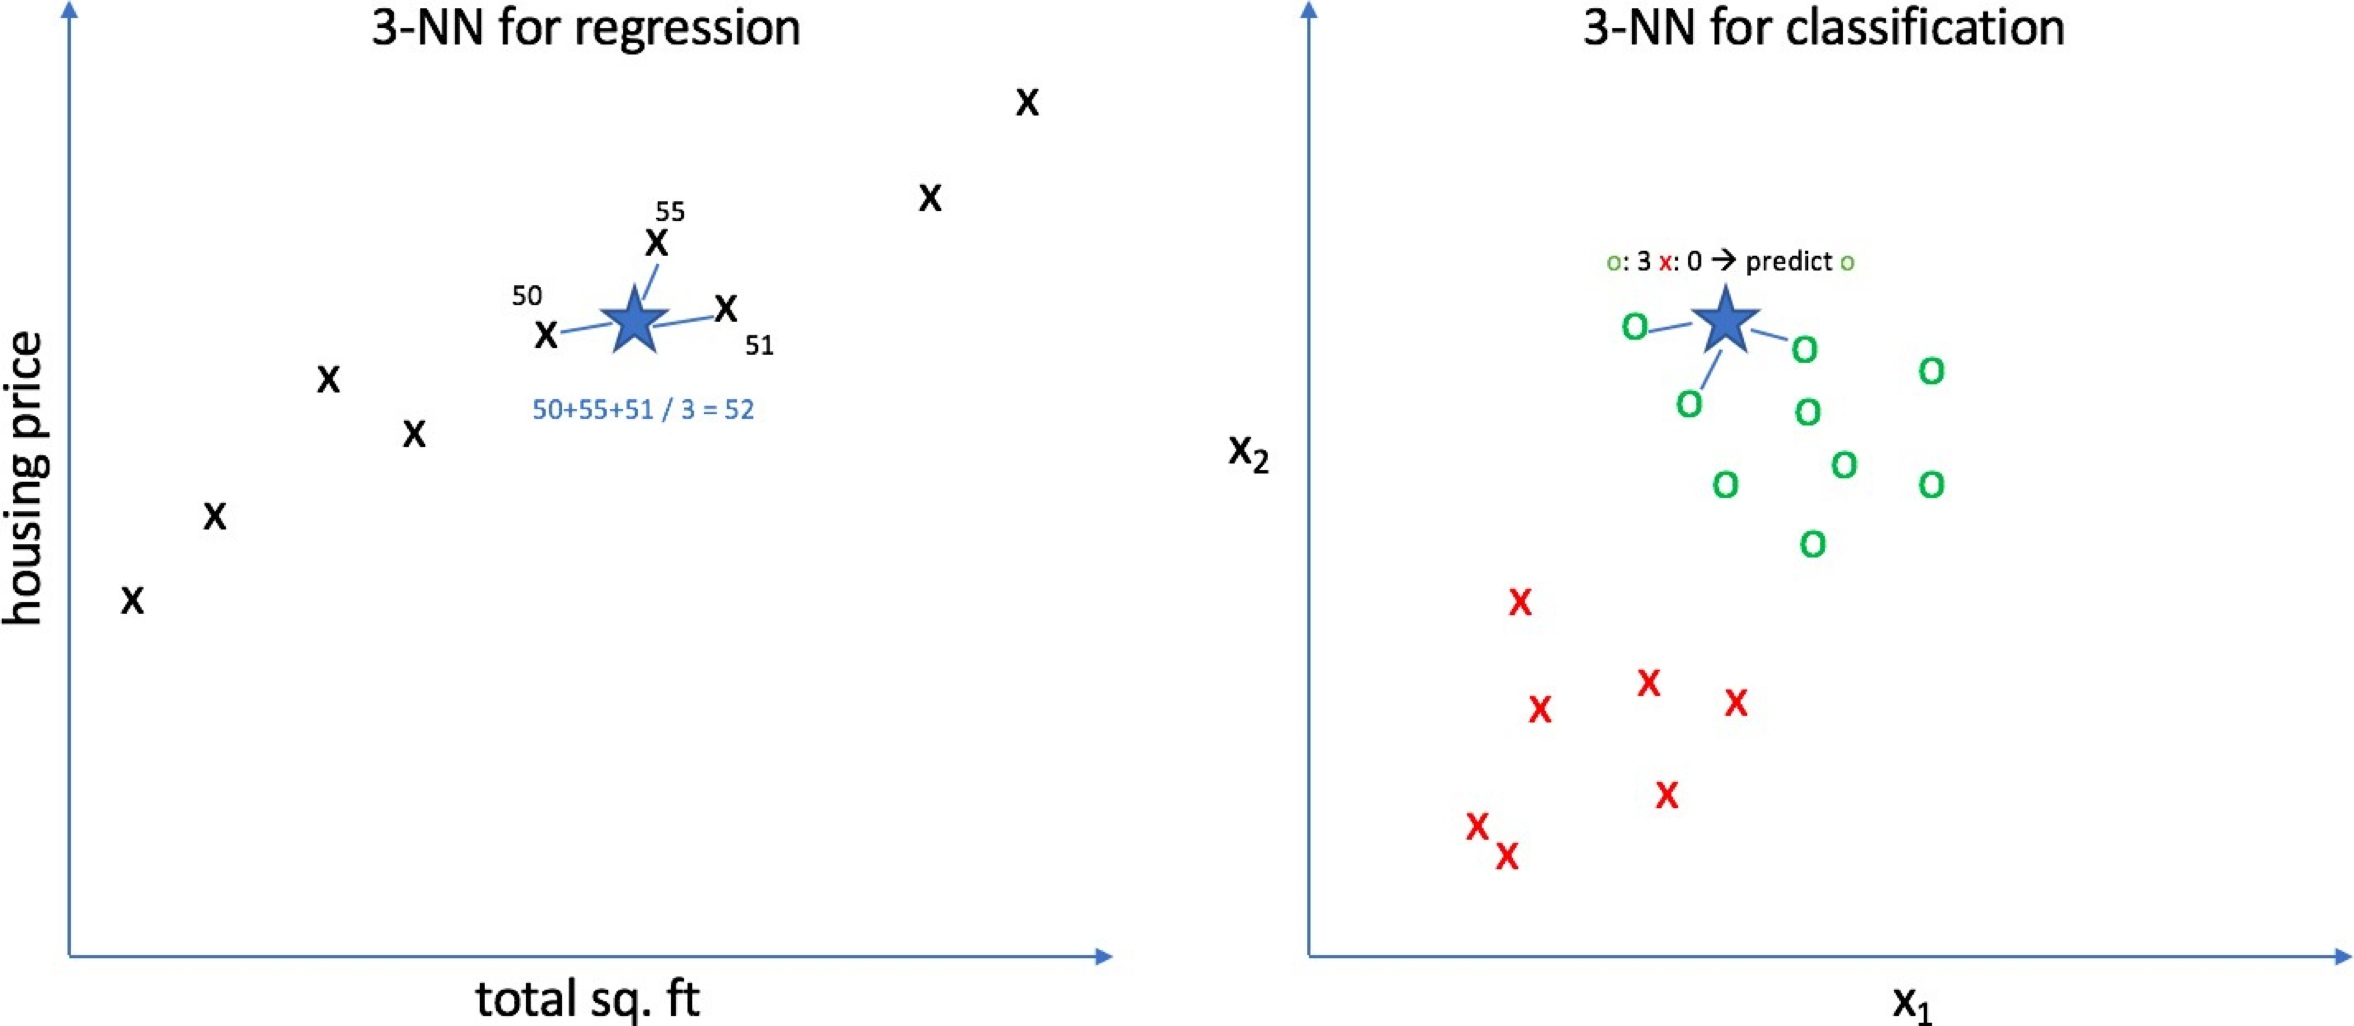



При использовании алгоритма KNN, «обучения» как такового не
происходит. Единственное, что, по сути, вам нужно сделать – это «запомнить» для точек их расположение в пространстве, а также их таргеты.

### Реализация kNN

Главный настраиваемый параметр алгоритма (то есть гиперпараметр) — это, конечно, число ближайших соседей (`k`). На практике, для многих задач нередко существует ярко выраженное оптимальное значение для данного параметра — то есть такое значение, что все меньше него и больше него будут давать результат хуже.

Полный список гиперпараметров, включающий различные модификации KNN, вы можете посмотреть на [странице библиотеки](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

#### Задание для самостоятельного решения (обучение KNN)

Обучите модель KNN, импортировав её из модуля `sklearn.neighbors`. Для обучения используйте стандартный интерфейс моделей машинного обучения из библиотеки `sklearn`.

При обучении число соседей используйте равное трем, а также установите Манхэттенскую метрику расстояний.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# your code here

# y_pred = ...

In [ ]:
y_pred

array([16398.66666667,  6854.66666667,  8041.33333333,  9214.        ,
        9879.        ,  6588.        , 13681.        , 23542.66666667,
        7239.66666667, 14979.66666667,  8720.66666667,  6007.        ,
       33042.66666667, 11615.33333333,  7865.66666667, 12325.        ,
       17149.        , 12608.        , 23213.66666667,  8207.33333333,
        9944.66666667, 12325.        , 33042.66666667, 18393.33333333,
       24232.        ,  6999.        , 23397.        , 14979.66666667,
       14667.        , 23542.66666667,  8041.33333333,  8546.33333333,
       23213.66666667,  5779.33333333, 13388.33333333,  6999.        ,
       21293.        , 11301.33333333, 33606.66666667, 14031.        ,
       14113.33333333])

Отлично! Мы смогли обучить модель машинного обучения на данных и получили предсказания для теста.

Теперь самый главный вопрос: а какая вообще у нас получилась модель: хорошая, средняя, плохая? Как это вообще понять?

### Метрики качества модели

Для оценки того, насколько модель эффективно справляется с поставленной задачей, используются различные метрики, называемые метриками качества.

В задачах регрессии качество выбранного решения часто оценивают по тому, как сильно алгоритм ошибается на отложенных данных. Так, например, часто смотрят на:

* Mean Squared Error (MSE): $\frac{1}{n}\sum\limits_i^n(\widetilde{y}_i - y_i)^2$
* Mean Absolute Error (MAE): $\frac{1}{n}\sum\limits_i^n|\widetilde{y}_i - y_i|$
* Max Error: $\max\limits_i |\widetilde{y}_i - y_i|$

где $\widetilde{y}$ — предсказанное значение, $y$ — реальное значение.

#### Задание для самостоятельного решения (метрики качества регрессии)

Напишите lambda-функции, принимающие на вход  $\widetilde{y}$, $y$ и подсчитывающие значения метрик качества, указанных выше.

In [ ]:
# your code here

# MSE = lambda y1, y2: ...
# MAE = lambda y1, y2: ...
# MAX_ERROR = lambda y1, y2: ...

Запустите ваши функции для вычисления метрик, и давайте сравним их ответ с ответом, который выдают встроенные функции библиотеки `sklearn`.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAX_ERROR: ", max_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Впрочем, с пониманием этих метрик всё равно есть определенная проблема. Какая?

### Продвинутые метрики качества регрессии

Все указанные выше метрики, к сожалению, позволяют лишь сравнивать модели друг с другом, но не дают никакого представления о том, насколько качественно работает наша модель относительно имеющихся у нас данных. Другими словами, понять, просто исходя из этих метрик, по модели, является ли она с точки зрения бизнеса хорошей, успешной или же нет — не представляется возможным.

В связи с этим были придуманы другие, более продвинутые способы измерять качество работы регрессии:

* Coefficient of determination ($R^2$): $1 - \frac{\sigma_{\widetilde{y}}^2}{\sigma_y^2} \in (-∞, 1]$
* Mean Absolute Percentage Error (MAPE): $100 \cdot \frac{1}{n}\sum\limits_i^n\left|\frac{y_i - \widetilde{y}_i}{y_i}\right| \in [0, +∞)$

#### Вопрос

Какие значения у этих метрик будут для наилучшей модели? Почему?

#### Вопрос

Чем эти метрики принципиально лучше предыдущих?

Посмотрим на реализации обеих метрик также через библиотеку `sklearn`.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

print("R2: ", r2_score(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

### Финальные размышления

Получив метрики для baseline решения, можно окинуть взлядом проделанную работу  и подумать, что можно было бы улучшить:

1. Подходят ли наши данные под требования в метрических алгоритмах?
2. Правильно ли было все категориальные признаки выкидывать? А кодировать все из них OHE?
3. Не слишком ли много получилось признаков на такое небольшое число данных?
4. Стоило ли заполнять средним строки с пропусками? Стоило ли их выкидывать? Как мы можем их обработать?
5. Как можно использовать поле `make`?

Именно этими улучшениями и стоит заняться в первую очередь! Как насчет править код прямо внутри бейзлайн решения? Надо только сохранить посчитанные метрики, чтобы убедиться, что мы не сделали хуже :)

Для будущего вдохновения:

In [ ]:
# Повторим пайплайн преобразования датасета data -> scaled data -> PCA data
# Создаем StandardScaler и обучаем его на трейне
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X_train)
X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test)

# Создаем PCA и обучаем его на нормализованном трейне
pca = PCA(n_components=10)
pca.fit(X_train_normed)

# Применяем трансформации
X_train_pca = pca.transform(X_train_normed)
X_test_pca = pca.transform(X_test_normed)

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors = 3, p = 1)

# Обучим модель
model_knn.fit(X_train_pca, y_train)

# Сделаем предсказание на тестовой выборке
y_pred = model_knn.predict(X_test_pca)

In [ ]:
y_pred

In [ ]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAX_ERROR: ", max_error(y_test, y_pred))

print("R2: ", r2_score(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))